## Задание 1. Определение дифференциальной экспрессии

In [174]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sys
import pandas as pd
from scipy.stats import pearsonr, spearmanr

In [203]:
counts = pd.read_csv("RiboSeq_RNASeq_HCC_counts.tsv", sep="\t")
genes = list(counts["geneSymbol"])
del counts["geneID"], counts["geneSymbol"]
counts = counts.fillna(0)
counts

,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,LC034-tumor-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
0,0,0,402,873,0,0,301,1627,0,0,...,218,457,0,0,200,889,0,0,161,857.0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.0
2,168,239,88,187,114,439,66,201,325,117,...,92,170,109,357,60,244,141,173,56,83.0
3,65,121,60,106,36,163,70,156,130,76,...,127,176,67,176,55,261,64,100,68,176.0
4,8,43,18,70,16,76,4,63,44,14,...,124,437,7,167,34,201,6,61,9,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,0,0,1,39,0,0,0,5,0,0,...,0,31,0,6,0,62,0,0,1,17.0
18941,0,4,27,5,0,32,20,51,0,6,...,81,52,1,0,9,42,0,10,3,40.0
18942,0,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
18943,0,9,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0.0


In [204]:
counts1 = pd.read_csv("RiboSeq_RNASeq_HCC_counts.tsv", sep="\t")
del counts1["geneID"]
counts1 = counts1.fillna(0)
df = counts1
df.columns = ["geneID", 'RPF', 'RPF', 'RNA', 'RNA', 'RPF', 'RPF', 'RNA', 'RNA', 'RPF', 'RPF', 'RNA', 'RNA', 'RPF', 'RPF', 'RNA', 'RNA', 'RPF', 'RPF', 'RNA', 'RNA', 'RPF', 'RPF', 'RNA', 'RNA', 'RPF', 'RPF', 'RNA', 'RNA', 'RPF', 'RPF', 'RNA', 'RNA', 'RPF', 'RPF', 'RNA', 'RNA', 'RPF', 'RPF', 'RNA', 'RNA']
df

,geneID,RPF,RPF,RNA,RNA,RPF,RPF,RNA,RNA,RPF,...,RNA,RNA,RPF,RPF,RNA,RNA,RPF,RPF,RNA,RNA
0,TSPAN6,0,0,402,873,0,0,301,1627,0,...,218,457,0,0,200,889,0,0,161,857.0
1,TNMD,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0.0
2,DPM1,168,239,88,187,114,439,66,201,325,...,92,170,109,357,60,244,141,173,56,83.0
3,SCYL3,65,121,60,106,36,163,70,156,130,...,127,176,67,176,55,261,64,100,68,176.0
4,C1orf112,8,43,18,70,16,76,4,63,44,...,124,437,7,167,34,201,6,61,9,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,RP1-34B20.21,0,0,1,39,0,0,0,5,0,...,0,31,0,6,0,62,0,0,1,17.0
18941,RP11-511P7.5,0,4,27,5,0,32,20,51,0,...,81,52,1,0,9,42,0,10,3,40.0
18942,KLF18,0,0,0,0,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0,0.0
18943,TRBV6-2,0,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [7]:
from scipy import stats

In [24]:
df1 = df
del df1["RPF"]
df1

,geneID,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,...,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA
0,TSPAN6,402,873,301,1627,258,65,226,353,208,...,153,361,157,333,218,457,200,889,161,857.0
1,TNMD,0,1,0,1,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0.0
2,DPM1,88,187,66,201,80,16,54,165,57,...,61,155,104,114,92,170,60,244,56,83.0
3,SCYL3,60,106,70,156,77,67,78,68,97,...,76,185,114,74,127,176,55,261,68,176.0
4,C1orf112,18,70,4,63,60,4,17,112,28,...,8,118,25,98,124,437,34,201,9,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,RP1-34B20.21,1,39,0,5,1,25,0,11,3,...,0,1,2,8,0,31,0,62,1,17.0
18941,RP11-511P7.5,27,5,20,51,12,49,16,47,43,...,23,46,50,102,81,52,9,42,3,40.0
18942,KLF18,0,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
18943,TRBV6-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [26]:
df2 = df
del df2["RNA"], df2["geneID"]
df2

,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0
2,168,239,114,439,325,117,106,192,118,292,159,237,149,230,169,260,109,357,141,173
3,65,121,36,163,130,76,34,43,84,221,74,185,65,98,81,105,67,176,64,100
4,8,43,16,76,44,14,5,27,24,42,10,71,18,103,79,225,7,167,6,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0
18941,0,4,0,32,0,6,1,37,4,15,0,7,0,0,0,0,1,0,0,10
18942,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18943,0,9,0,0,0,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
df2

,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0
2,168,239,114,439,325,117,106,192,118,292,159,237,149,230,169,260,109,357,141,173
3,65,121,36,163,130,76,34,43,84,221,74,185,65,98,81,105,67,176,64,100
4,8,43,16,76,44,14,5,27,24,42,10,71,18,103,79,225,7,167,6,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0
18941,0,4,0,32,0,6,1,37,4,15,0,7,0,0,0,0,1,0,0,10
18942,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18943,0,9,0,0,0,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
a = df1.join(df2)
a

,geneID,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,...,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF
0,TSPAN6,402,873,301,1627,258,65,226,353,208,...,0,0,0,0,0,0,0,0,0,0
1,TNMD,0,1,0,1,0,0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
2,DPM1,88,187,66,201,80,16,54,165,57,...,159,237,149,230,169,260,109,357,141,173
3,SCYL3,60,106,70,156,77,67,78,68,97,...,74,185,65,98,81,105,67,176,64,100
4,C1orf112,18,70,4,63,60,4,17,112,28,...,10,71,18,103,79,225,7,167,6,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,RP1-34B20.21,1,39,0,5,1,25,0,11,3,...,0,0,0,0,0,0,0,6,0,0
18941,RP11-511P7.5,27,5,20,51,12,49,16,47,43,...,0,7,0,0,0,0,1,0,0,10
18942,KLF18,0,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18943,TRBV6-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
corrs = []
for i in range(len(a)):
    corrs.append(stats.spearmanr(a.iloc[i, 1:20], a.iloc[i, 21:40])) 

c:\users\рф\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


### Была выбрана корреляция Спирмана, поскольку она устойчивее к выбросам (не требует одинаковой дисперсии у образцов) и её можно применять к нелинейно зависимым данным

In [291]:
corr = pd.DataFrame(corrs)
f = a.join(corr)
f

,geneID,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,...,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,correlation,pvalue
0,TSPAN6,402,873,301,1627,258,65,226,353,208,...,0,0,0,0,0,0,0,0,NaN,NaN
1,TNMD,0,1,0,1,0,0,0,0,3,...,0,0,0,0,1,0,0,0,-0.147807,0.545930
2,DPM1,88,187,66,201,80,16,54,165,57,...,149,230,169,260,109,357,141,173,0.854386,0.000003
3,SCYL3,60,106,70,156,77,67,78,68,97,...,65,98,81,105,67,176,64,100,0.686567,0.001168
4,C1orf112,18,70,4,63,60,4,17,112,28,...,18,103,79,225,7,167,6,61,0.797718,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,RP1-34B20.21,1,39,0,5,1,25,0,11,3,...,0,0,0,0,0,6,0,0,0.392497,0.096475
18941,RP11-511P7.5,27,5,20,51,12,49,16,47,43,...,0,0,0,0,1,0,0,10,0.182302,0.455073
18942,KLF18,0,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
18943,TRBV6-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [289]:
#были убраны нулевые значения и оставлены гены только со значимой по p-value корреляцией
filtred = f.dropna()
filtred_min = filtred.loc[filtred["pvalue"]<0.05]
filtred_min = filtred_min.loc[filtred["correlation"].abs()<0.48]
filtred_min = filtred_min.sort_values("correlation")
filtred_min

,geneID,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,...,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,correlation,pvalue
17999,RP5-966M1.6,56,4,134,38,199,0,82,56,393,...,0,0,0,0,0,5,0,0,-0.469874,0.042363
14080,CSNK1A1L,0,0,9,0,1,0,1,0,0,...,0,0,2,1,0,0,0,0,-0.463985,0.045382
1594,ZNF586,29,41,54,36,12,54,18,14,72,...,0,6,7,1,8,5,15,27,-0.462319,0.046265
11775,SGK494,23,8,58,0,41,100,20,13,71,...,0,0,0,0,0,0,0,0,-0.458868,0.048136
17456,ISPD,36,75,49,71,27,54,27,29,36,...,8,34,14,0,7,17,9,28,0.455546,0.049991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,SEMA3B,33,3,43,24,68,193,27,48,45,...,10,76,2,0,5,4,6,0,0.479725,0.037662
13558,KBTBD11,139,10,119,1,186,55,106,4,179,...,1,0,3,0,7,8,10,0,0.479739,0.037655
15805,SIRPB2,7,0,3,3,18,21,8,0,22,...,21,5,1,5,1,0,0,6,0.479781,0.037636
5817,FBXL16,4,0,14,2,4,44,2,8,0,...,0,0,0,0,0,0,0,0,0.479790,0.037632


In [288]:
#Топ-10 генов с наиболее низкой корреляцией
genes_corr = filtred_min.iloc[:10]
for row in genes_corr['geneID']:
    print(row, end = " ")

RP5-966M1.6 CSNK1A1L ZNF586 SGK494 ISPD IFITM1 BTNL9 ATP5S USP28 CELF2 

In [ ]:
## Для генов с низкой корреляцией может быть предположена иная функция, нежели синтез белка -- это могут быть интерферирующие РНК, основная функция которых выполняется при их существовании в виде, собственно, молекул РНК без активного синтеза белка рибосомами

In [300]:
filtred = f.dropna()
filtred_max = filtred.loc[filtred["pvalue"]<0.05]
filtred_max = filtred_max.loc[filtred_max["correlation"].abs()<0.9999]
filtred_max = filtred_max.sort_values("correlation", ascending = False)
filtred_max

,geneID,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,...,RPF,RPF,RPF,RPF,RPF,RPF,RPF,RPF,correlation,pvalue
4534,PRG4,1538,252,787,162,2239,17,2179,527,2417,...,5065,4375,1601,104,4083,1257,4945,4601,0.992982,3.322160e-17
12719,LGALS4,95,14,230,459,217,1205,230,838,100,...,748,3919,167,56,248,913,209,27,0.982441,7.791685e-14
9747,HKDC1,54,74,35,194,25,176,50,33,51,...,83,528,182,108,53,473,6,36,0.981563,1.176130e-13
8912,HABP2,1702,75,1200,1177,2050,49,1544,755,1784,...,2621,813,1090,44,2786,900,3426,3231,0.978947,3.600642e-13
11889,CYP7A1,267,4,42,560,164,22,51,128,75,...,101,5,28,11,64,9,42,89,0.977622,6.023249e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SOX8,8,0,14,0,13,33,12,3,59,...,0,0,0,0,0,0,0,0,-0.568925,1.101948e-02
1807,RPH3A,182,2,124,5,95,32,7,1,9,...,0,0,0,0,0,5,0,0,-0.598201,6.820125e-03
17336,LAT,2,0,0,0,0,0,0,0,10,...,0,3,1,3,2,6,0,3,-0.616432,4.942465e-03
16492,ZNF358,177,87,68,51,137,106,136,81,301,...,9,6,5,7,6,21,2,0,-0.698331,8.828539e-04


In [301]:
#Топ-10 генов с наиболее высокой корреляцией
genes_corr2 = filtred_max.iloc[:10]
for row in genes_corr2['geneID']:
    print(row, end = " ")

PRG4 LGALS4 HKDC1 HABP2 CYP7A1 HPR FGB AKR1D1 ITIH3 C8A 

In [ ]:
#для этих генов (преимущественно относятся к онкомаркерам) может быть предположена высокоэффективная трансляция -- при большом количестве транксрипта рибосомами синтезируется большое количество белка

array([[<AxesSubplot:title={'center':'correlation'}>]], dtype=object)

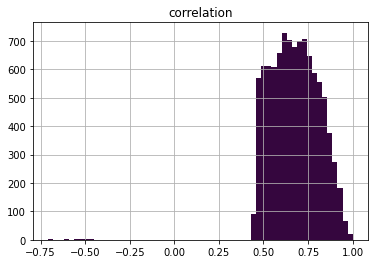

In [32]:
filtred.hist(column='correlation', bins=60, color='#35063e')

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-51-86da6c9fd2f5>:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(0, 100000); ax.set_ylim(0, 1000000)
<ipython-input-51-86da6c9fd2f5>:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(0, 100000); ax.set_ylim(0, 1000000)


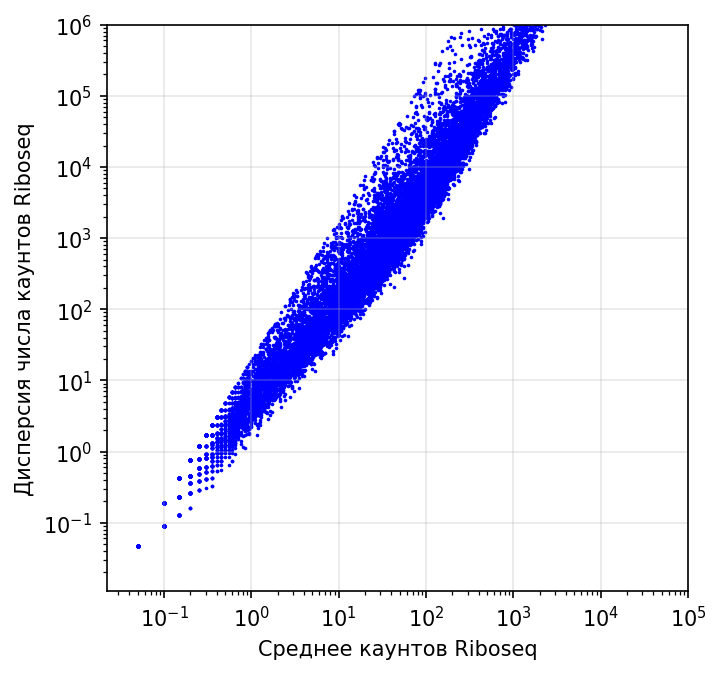

In [51]:
variance = np.var(df2, axis=1)
mean = np.mean(df2, axis=1)
mean = mean[variance > 0]
variance = variance[variance > 0]

fig, ax = plt.subplots(dpi=150, figsize=(5, 5))

sns.scatterplot(x=mean, y=variance, linewidth=0, s=3, color="blue", ax=ax)
ax.set_xlabel("Среднее каунтов Riboseq"); ax.set_ylabel("Дисперсия числа каунтов Riboseq")
ax.set_xscale("log"); ax.set_yscale("log")
ax.set_xlim(0, 100000); ax.set_ylim(0, 1000000)

ax.grid(alpha=0.3)

#### График полученного распределения визуально похож на график отрицательного биномиального распределения. Для проверки гипотезы можно провести хи-квадрат-тест и применить критерий Колмогорова


In [205]:
#Расчёт дифэкспрессии для Ribo-seq
counts = pd.read_csv("RiboSeq_RNASeq_HCC_counts.tsv", sep="\t")
genes = list(counts["geneSymbol"])
del counts["geneID"], counts["geneSymbol"]
counts = counts.fillna(0)
counts

,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,LC034-tumor-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
0,0,0,402,873,0,0,301,1627,0,0,...,218,457,0,0,200,889,0,0,161,857.0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.0
2,168,239,88,187,114,439,66,201,325,117,...,92,170,109,357,60,244,141,173,56,83.0
3,65,121,60,106,36,163,70,156,130,76,...,127,176,67,176,55,261,64,100,68,176.0
4,8,43,18,70,16,76,4,63,44,14,...,124,437,7,167,34,201,6,61,9,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,0,0,1,39,0,0,0,5,0,0,...,0,31,0,6,0,62,0,0,1,17.0
18941,0,4,27,5,0,32,20,51,0,6,...,81,52,1,0,9,42,0,10,3,40.0
18942,0,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
18943,0,9,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0.0


In [212]:
#Подготовка датасета, содержащего только данные Ribo-seq
columns = ['LC001-normal-RNA', 'LC001-tumor-RNA', 'LC033-normal-RNA', 'LC033-tumor-RNA', 'LC034-normal-RNA', 'LC034-tumor-RNA', 'LC501-normal-RNA', 'LC501-tumor-RNA', 'LC502-normal-RNA', 'LC502-tumor-RNA', 'LC505-normal-RNA', 'LC505-tumor-RNA', 'LC506-normal-RNA', 'LC506-tumor-RNA', 'LC507-normal-RNA', 'LC507-tumor-RNA', 'LC508-normal-RNA', 'LC508-tumor-RNA', 'LC509-normal-RNA', 'LC509-tumor-RNA']
RPF_counts = counts.drop(columns, axis=1)

In [213]:
RPF_counts

,LC001-normal-RPF,LC001-tumor-RPF,LC033-normal-RPF,LC033-tumor-RPF,LC034-normal-RPF,LC034-tumor-RPF,LC501-normal-RPF,LC501-tumor-RPF,LC502-normal-RPF,LC502-tumor-RPF,LC505-normal-RPF,LC505-tumor-RPF,LC506-normal-RPF,LC506-tumor-RPF,LC507-normal-RPF,LC507-tumor-RPF,LC508-normal-RPF,LC508-tumor-RPF,LC509-normal-RPF,LC509-tumor-RPF
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0
2,168,239,114,439,325,117,106,192,118,292,159,237,149,230,169,260,109,357,141,173
3,65,121,36,163,130,76,34,43,84,221,74,185,65,98,81,105,67,176,64,100
4,8,43,16,76,44,14,5,27,24,42,10,71,18,103,79,225,7,167,6,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0
18941,0,4,0,32,0,6,1,37,4,15,0,7,0,0,0,0,1,0,0,10
18942,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18943,0,9,0,0,0,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0


In [239]:
#Создание матрицы дизайна экспреримента
design1 = pd.DataFrame({
    "condition": [sample_name.split("-")[1] for sample_name in RPF_counts.columns],
    "experiment": [sample_name.split("-")[2] for sample_name in RPF_counts.columns],
}, index=RPF_counts.columns)

design1.head()

,condition,experiment
LC001-normal-RPF,normal,RPF
LC001-tumor-RPF,tumor,RPF
LC033-normal-RPF,normal,RPF
LC033-tumor-RPF,tumor,RPF
LC034-normal-RPF,normal,RPF


In [230]:
#Обработка данных с помощью DEseq2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import logging
DESeq2 = importr("DESeq2")

with localconverter(ro.pandas2ri.converter):
    countData = pandas2ri.py2rpy(RPF_counts.astype(int))
    colData = pandas2ri.py2rpy(design1)
    
dds = DESeq2.DESeqDataSetFromMatrix(
    countData=countData,
    colData=colData,
    design=ro.Formula("~ condition"),
)

dds = DESeq2.DESeq(dds)

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 888 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



In [231]:
to_dataframe = ro.r("function(x) data.frame(x)")
dds_results_RPF = to_dataframe(DESeq2.results(dds))

with localconverter(pandas2ri.converter):
    dds_results_RPF = ro.conversion.rpy2py(dds_results_RPF)
    dds_results_RPF.index = genes

In [240]:
#Сортирвка данных по скорректированному p-value и удаление строк с Nan-значениями
res_RPF = dds_results_RPF.sort_values("padj")
res_RPF = res_RPF.dropna()
res_RPF

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
CETP,234.706196,-3.661168,0.328144,-11.157205,6.603531e-29,9.219850e-25
OIT3,378.527099,-4.123941,0.384101,-10.736618,6.850819e-27,4.782557e-23
TIMD4,115.823325,-4.410428,0.424721,-10.384291,2.923339e-25,1.360522e-21
ADGRA3,351.272069,-3.789142,0.368147,-10.292473,7.619383e-25,2.659546e-21
CLEC4M,60.025648,-6.019149,0.589470,-10.211112,1.768264e-24,4.937702e-21
...,...,...,...,...,...,...
DACT3,64.581705,0.000674,0.994851,0.000678,9.994593e-01,9.997458e-01
C19orf57,4.743785,0.000529,1.174147,0.000450,9.996406e-01,9.997838e-01
SLC30A9,79.700952,0.000121,0.256093,0.000473,9.996223e-01,9.997838e-01
SCO1,153.895745,0.000063,0.251704,0.000248,9.998018e-01,9.998734e-01


Text(0.5, 0, 'log$_2$FoldChange')

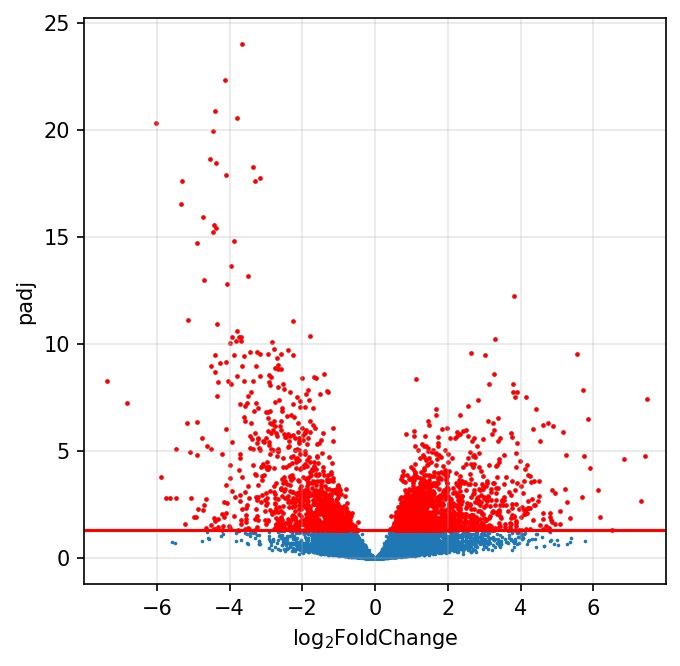

In [241]:
p_tr = 0.05

fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
xlim = max(-min(res_RPF.log2FoldChange), (max(res_RPF.log2FoldChange))) + 0.5

sns.scatterplot(
    x=res_RPF.log2FoldChange,
    y=-np.log10(res_RPF.padj),
    ax=ax,
    s=3,
    linewidth=0,
)

ax.plot(
    [-xlim, xlim],
    [-np.log10(p_tr), -np.log10(p_tr)],
    color="red",
)

sns.scatterplot(
    x=res_RPF[res_RPF.padj < p_tr].log2FoldChange,
    y=-np.log10(res_RPF[res_RPF.padj < p_tr].padj),
    ax=ax,
    s=5,
    linewidth=0,
    color="red",
)

ax.grid(alpha=0.3)

ax.set_xlim(-xlim, xlim)
ax.set_xlabel("log$_2$FoldChange")

In [242]:
#Выведение наиболее значимо дифференциально экспрессированных генов
res_RPF_genes = res_RPF.loc[res_RPF["padj"]<0.05]
res_RPF_genes = res_RPF_genes.loc[res_RPF_genes["log2FoldChange"].abs() >= 1]
res_RPF_genes 

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
CETP,234.706196,-3.661168,0.328144,-11.157205,6.603531e-29,9.219850e-25
OIT3,378.527099,-4.123941,0.384101,-10.736618,6.850819e-27,4.782557e-23
TIMD4,115.823325,-4.410428,0.424721,-10.384291,2.923339e-25,1.360522e-21
ADGRA3,351.272069,-3.789142,0.368147,-10.292473,7.619383e-25,2.659546e-21
CLEC4M,60.025648,-6.019149,0.589470,-10.211112,1.768264e-24,4.937702e-21
...,...,...,...,...,...,...
TRAF2,40.570419,1.344821,0.514720,2.612724,8.982373e-03,4.945264e-02
SOX9,63.848284,1.603262,0.613808,2.611991,9.001665e-03,4.950030e-02
TSR3,40.195427,1.102950,0.422365,2.611366,9.018143e-03,4.955810e-02
HS6ST1,13.879786,1.542853,0.590946,2.610818,9.032600e-03,4.961179e-02


In [222]:
#Подготовка датасета, содержащего только данные RNA-seq
counts = pd.read_csv("RiboSeq_RNASeq_HCC_counts.tsv", sep="\t")
genes = list(counts["geneSymbol"])
del counts["geneID"], counts["geneSymbol"]
counts = counts.fillna(0)
columns = ['LC001-normal-RPF', 'LC001-tumor-RPF', 'LC033-normal-RPF', 'LC033-tumor-RPF', 'LC034-normal-RPF', 'LC034-tumor-RPF', 'LC501-normal-RPF', 'LC501-tumor-RPF', 'LC502-normal-RPF', 'LC502-tumor-RPF', 'LC505-normal-RPF', 'LC505-tumor-RPF', 'LC506-normal-RPF', 'LC506-tumor-RPF', 'LC507-normal-RPF', 'LC507-tumor-RPF', 'LC508-normal-RPF', 'LC508-tumor-RPF', 'LC509-normal-RPF', 'LC509-tumor-RPF']
RNA_counts = counts.drop(columns, axis=1)

In [223]:
RNA_counts

,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RNA,LC034-tumor-RNA,LC501-normal-RNA,LC501-tumor-RNA,LC502-normal-RNA,LC502-tumor-RNA,LC505-normal-RNA,LC505-tumor-RNA,LC506-normal-RNA,LC506-tumor-RNA,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RNA,LC509-tumor-RNA
0,402,873,301,1627,258,65,226,353,208,399,153,361,157,333,218,457,200,889,161,857.0
1,0,1,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0.0
2,88,187,66,201,80,16,54,165,57,174,61,155,104,114,92,170,60,244,56,83.0
3,60,106,70,156,77,67,78,68,97,128,76,185,114,74,127,176,55,261,68,176.0
4,18,70,4,63,60,4,17,112,28,14,8,118,25,98,124,437,34,201,9,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,1,39,0,5,1,25,0,11,3,26,0,1,2,8,0,31,0,62,1,17.0
18941,27,5,20,51,12,49,16,47,43,132,23,46,50,102,81,52,9,42,3,40.0
18942,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
18943,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [233]:
#Создание матрицы дизайна эксперимента
design2 = pd.DataFrame({
    "condition": [sample_name.split("-")[1] for sample_name in RNA_counts.columns],
    "experiment": [sample_name.split("-")[2] for sample_name in RNA_counts.columns],
}, index=RNA_counts.columns)

design2.head()

,condition,experiment
LC001-normal-RNA,normal,RNA
LC001-tumor-RNA,tumor,RNA
LC033-normal-RNA,normal,RNA
LC033-tumor-RNA,tumor,RNA
LC034-normal-RNA,normal,RNA


In [234]:
#Обработка данных с помощью DEseq2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import logging
DESeq2 = importr("DESeq2")

with localconverter(ro.pandas2ri.converter):
    countData = pandas2ri.py2rpy(RNA_counts.astype(int))
    colData = pandas2ri.py2rpy(design2)
    
dds1 = DESeq2.DESeqDataSetFromMatrix(
    countData=countData,
    colData=colData,
    design=ro.Formula("~condition"),
)

dds1 = DESeq2.DESeq(dds1)

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 1242 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



In [235]:
to_dataframe = ro.r("function(x) data.frame(x)")
dds_results_RNA = to_dataframe(DESeq2.results(dds1))

with localconverter(pandas2ri.converter):
    dds_results_RNA = ro.conversion.rpy2py(dds_results_RNA)
    dds_results_RNA.index = genes

In [236]:
#Сортирвка данных по скорректированному p-value и удаление строк с Nan-значениями
res_RNA = dds_results_RNA.sort_values("padj")
res_RNA = res_RNA.dropna()
res_RNA

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
CLEC4G,187.902511,-6.224294,0.471543,-13.199842,8.791966e-40,1.464478e-35
OIT3,207.433311,-4.190143,0.372389,-11.252055,2.262593e-29,1.884400e-25
AVPR1A,216.785200,-4.836026,0.444956,-10.868551,1.627649e-27,8.917125e-24
INS-IGF2,517.466267,-5.941896,0.547969,-10.843493,2.141352e-27,8.917125e-24
FCN2,154.170314,-5.700993,0.527201,-10.813696,2.964778e-27,9.876861e-24
...,...,...,...,...,...,...
BLVRB,429.150794,0.000297,0.380186,0.000781,9.993771e-01,9.996171e-01
PLEKHH2,45.162717,-0.000135,0.661996,-0.000204,9.998374e-01,9.999312e-01
SHROOM1,413.467462,0.000046,0.338922,0.000135,9.998921e-01,9.999312e-01
CDH26,4.978278,-0.000091,0.868604,-0.000104,9.999168e-01,9.999312e-01


In [243]:
#Топ-10 дифференциально экспрессируемых генов для RNA-seq
res_RNA = res_RNA.loc[res_RNA["padj"]<0.05]
res_RNA = res_RNA.loc[res_RNA["log2FoldChange"].abs() >= 1]
genes_RNA = res_RNA.iloc[:10]
for row in genes_RNA.index:
    print(row, end = " ")

CLEC4G OIT3 AVPR1A INS-IGF2 FCN2 CFP CLEC4M HAMP CETP FCN3 

In [244]:
#Топ-10 дифференциально экспрессируемых гены для Ribo-seq
genes_RPF = res_RPF_genes.iloc[:10]
for row in genes_RPF.index:
    print(row, end = " ")

CETP OIT3 TIMD4 ADGRA3 CLEC4M CRHBP IGF1 APOF LYVE1 HAO2 

##### Совпадает только ген OIT3, в остальном наиболее дифференциально экспрессированные гены отличаются. Из научных статей можно найти информацию, что его экспрессия даун-регулируется в клетках гепатоцеллюлярной карциномы

Text(0.5, 0, 'log$_2$FoldChange')

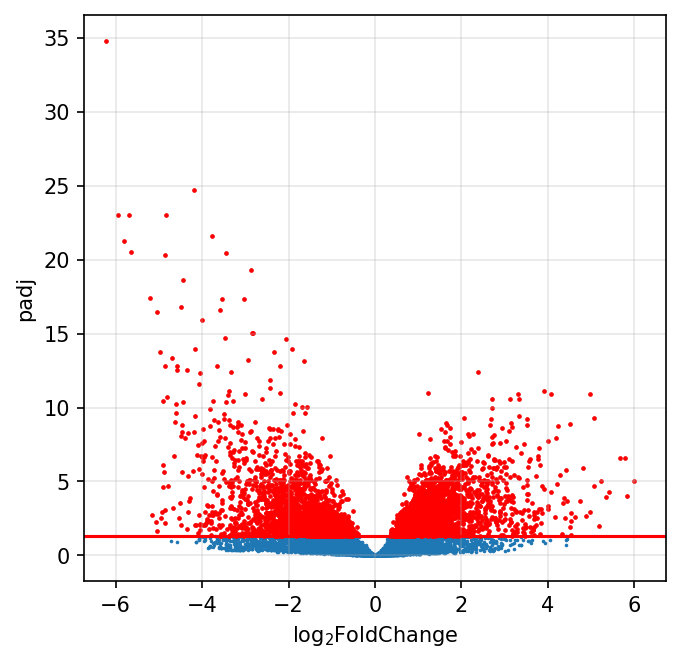

In [173]:
p_tr = 0.05

fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
xlim = max(-min(res_RNA.log2FoldChange), (max(res_RNA.log2FoldChange))) + 0.5

sns.scatterplot(
    x=res_RNA.log2FoldChange,
    y=-np.log10(res_RNA.padj),
    ax=ax,
    s=3,
    linewidth=0,
)

ax.plot(
    [-xlim, xlim],
    [-np.log10(p_tr), -np.log10(p_tr)],
    color="red",
)

sns.scatterplot(
    x=res_RNA[res_RNA.padj < p_tr].log2FoldChange,
    y=-np.log10(res_RNA[res_RNA.padj < p_tr].padj),
    ax=ax,
    s=5,
    linewidth=0,
    color="red",
)

ax.grid(alpha=0.3)

ax.set_xlim(-xlim, xlim)
ax.set_xlabel("log$_2$FoldChange")

In [217]:
# Design matrix
design = pd.DataFrame({
    "condition": [sample_name.split("-")[1] for sample_name in counts.columns],
    "experiment": [sample_name.split("-")[2] for sample_name in counts.columns],
}, index=counts.columns)

design.head()

,condition,experiment
LC001-normal-RPF,normal,RPF
LC001-tumor-RPF,tumor,RPF
LC001-normal-RNA,normal,RNA
LC001-tumor-RNA,tumor,RNA
LC033-normal-RPF,normal,RPF


In [191]:
# DESeq2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

DESeq2 = importr("DESeq2")

with localconverter(ro.pandas2ri.converter):
    countData = pandas2ri.py2rpy(counts.astype(int))
    colData = pandas2ri.py2rpy(design)
    
dds = DESeq2.DESeqDataSetFromMatrix(
    countData=countData,
    colData=colData,
    design=ro.Formula("~ condition + experiment + experiment:condition"),
)

dds = DESeq2.DESeq(dds)

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 783 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



In [194]:
# Getting the results
to_dataframe = ro.r("function(x) data.frame(x)")
dds_results = to_dataframe(DESeq2.results(dds, name="conditiontumor.experimentRPF"))

with localconverter(pandas2ri.converter):
    dds_results = ro.conversion.rpy2py(dds_results)
    dds_results.index = genes

Text(0.5, 0, 'log$_2$FoldChange')

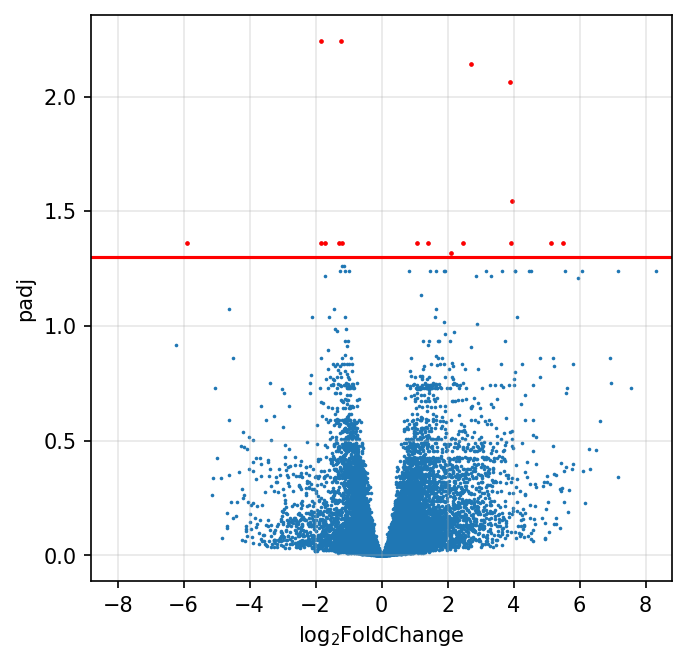

In [195]:
# Volcano
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

p_tr = 0.05

fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
xlim = max(-min(dds_results.log2FoldChange), (max(dds_results.log2FoldChange))) + 0.5

sns.scatterplot(
    x=dds_results.log2FoldChange,
    y=-np.log10(dds_results.padj),
    ax=ax,
    s=3,
    linewidth=0,
)

ax.plot(
    [-xlim, xlim],
    [-np.log10(p_tr), -np.log10(p_tr)],
    color="red",
)

sns.scatterplot(
    x=dds_results[dds_results.padj < p_tr].log2FoldChange,
    y=-np.log10(dds_results[dds_results.padj < p_tr].padj),
    ax=ax,
    s=5,
    linewidth=0,
    color="red",
)

ax.grid(alpha=0.3)

ax.set_xlim(-xlim, xlim)
ax.set_xlabel("log$_2$FoldChange")

In [246]:
#Топ-10 генов, имеющих статистически значимую разницу в эффективности трансляции
res = dds_results.sort_values("padj")
res = res.loc[res["padj"]<0.05]
res = res.loc[res["log2FoldChange"].abs() >= 1]
genes_total = res.iloc[:10]
for row in genes_total.index:
    print(row, end = " ")

DMXL1 UAP1 DPP9 CDC25A KIAA1211L RAB11B PNPT1 NKX3-2 AKAP11 LRRC19 

##### Анализ разности эффективности трансляции предоставляет третий набор генов, не совпадающий с данными RNA-seq и Ribo-seq

## Задание 2. Анализ wig-файла

In [680]:
df_f = pd.read_csv("RiboSeq_EColi_track_f.wig", sep="\t")
df_f['region'] = df_f.index
df_f = df_f.reset_index(drop=True)
neworder = ['region','variableStep chrom=U00096.3']
df_f=df_f.reindex(columns=neworder)
df_f

,region,variableStep chrom=U00096.3
0,40,1
1,77,2
2,85,1
3,139,1
4,147,1
...,...,...
621390,4641624,3
621391,4641625,1
621392,4641626,1
621393,4641634,1


In [416]:
df_r = pd.read_csv("RiboSeq_EColi_track_r.wig", sep="\t")
df_r['region'] = df_r.index
df_r = df_r.reset_index(drop=True)
neworder = ['region','variableStep chrom=U00096.3']
df_r=df_r.reindex(columns=neworder)
df_r

,region,variableStep chrom=U00096.3
0,585,1
1,1212,1
2,1292,1
3,3626,1
4,3979,1
...,...,...
643340,4641358,1
643341,4641368,1
643342,4641372,1
643343,4641459,1


In [ ]:
#Аннотация была скачена по приведённой ссылке в формате gff3 и переведена в формат .txt на локальном устройстве с удаление заголовка 
#https://www.ncbi.nlm.nih.gov/nuccore/U00096.3?report=genbank

In [9]:
annotation = pd.read_csv('an.txt', sep='\t')
df = annotation.drop(annotation[annotation.region != 'gene'].index)
df = df.reset_index(drop=True)
df

,U00096.3,Genbank,region,1,4641652,.,+,..1,ID=U00096.3:1..4641652;Dbxref=taxon:511145;Is_circular=true;Name=ANONYMOUS;gbkey=Src;genome=chromosome;mol_type=genomic DNA;strain=K-12;substrain=MG1655
0,U00096.3,Genbank,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
1,U00096.3,Genbank,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
2,U00096.3,Genbank,gene,2801,3733,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E..."
3,U00096.3,Genbank,gene,3734,5020,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E..."
4,U00096.3,Genbank,gene,5234,5530,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G..."
...,...,...,...,...,...,...,...,...,...
4489,U00096.3,Genbank,gene,4638178,4639530,.,+,.,"ID=gene-b4400;Dbxref=ASAP:ABE-0014432,ECOCYC:E..."
4490,U00096.3,Genbank,gene,4639590,4640306,.,-,.,"ID=gene-b4401;Dbxref=ASAP:ABE-0014434,ECOCYC:E..."
4491,U00096.3,Genbank,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."
4492,U00096.3,Genbank,gene,4640718,4640771,.,+,.,ID=gene-b4824;Dbxref=ECOCYC:G0-17098;Name=ytjE...


In [454]:
res = df.loc[568]
res
#Рассмотрим ген nfrB, циклическую гликолитрансферазу c координатами 590941-593178

U00096.3                                                                                                                                                                                             U00096.3
Genbank                                                                                                                                                                                               Genbank
region                                                                                                                                                                                                   gene
1                                                                                                                                                                                                      590941
4641652                                                                                                                                                                         

In [468]:
for_nfrB = df_f.loc[df_f["region"]>=590941]
for_nfrB = for_nfrB.loc[for_nfrB["region"]<=593178]
for_nfrB

,region,variableStep chrom=U00096.3
115756,590985,1
115757,591024,1
115758,591510,1
115759,592067,1
115760,592071,1
115761,592139,1
115762,592141,1
115763,592352,1
115764,592582,1
115765,592903,1


array([[<AxesSubplot:title={'center':'region'}>]], dtype=object)

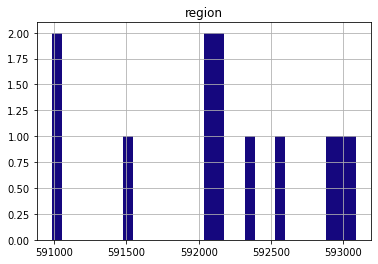

In [464]:
for_nfrB.hist(column='region', bins=30, color='#15077e')

In [ ]:
#плотность покрытия данного гена смещена к 3'-концу для прямого прочтения

In [465]:
for_nfrB1 = df_r.loc[df_r["region"]>=590941]
for_nfrB1 = for_nfrB1[for_nfrB1["region"]<=593178]
for_nfrB1

,region,variableStep chrom=U00096.3
64114,590945,4
64115,590952,1
64116,590953,1
64117,590954,3
64118,590961,1
...,...,...
64171,593024,1
64172,593088,1
64173,593124,1
64174,593141,2


array([[<AxesSubplot:title={'center':'region'}>]], dtype=object)

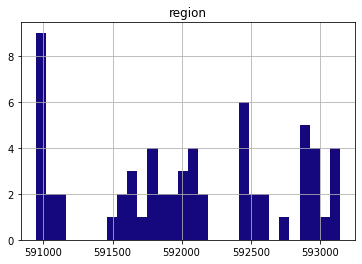

In [467]:
for_nfrB1.hist(column='region', bins=30, color='#15077e')

In [ ]:
#для обратного прочтения покрытие более полное, однако по-прежнему наблюдается смещение плотности покрытия к 3'-концу

#Рассчитайте значения RPKM и TPM для каждого гена. В чём
#разница между RPKM и TPM?

RPKM и TPM -- два способа расчёта нормировки на длину библиотеки
При расчёте RPKM сначала происходит нормировка на количество ридов, затем на длину генов, при расчёте TPM наоборот

Расчётные формулы:
RPK (reads per kilobase) = [число ридов]* (10^3)/[длина гена] 
RPM (reads per million) = [число ридов]* (10^6)/[общее количество ридов в образце] 
RPKM = RPM * (10^3)/[длина гена] 
TPM = RPK * (10^6)/[сумма PPK в образце] 